In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [115]:
df = pd.read_csv("Mall_Customers.csv")

In [116]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


DATA PREPROCESSING

In [119]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [120]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [121]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.to_csv("preprocessed_data.csv", index=False)

DATA ANALYSIS

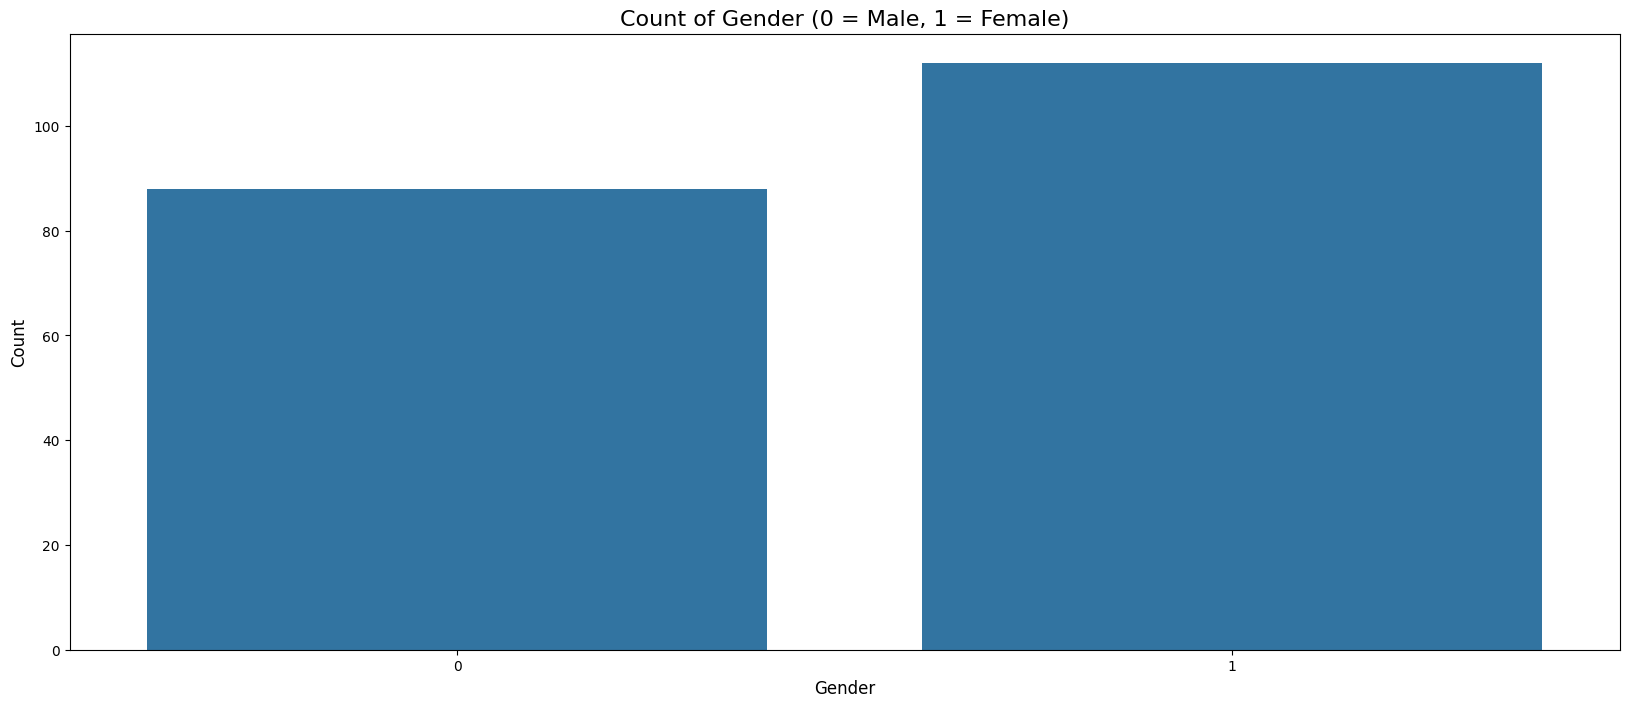

In [122]:
sns.countplot(x=df['Gender'])
plt.title('Count of Gender (0 = Male, 1 = Female)', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
plt.savefig("Gender_Count.png", dpi=300)
plt.close()

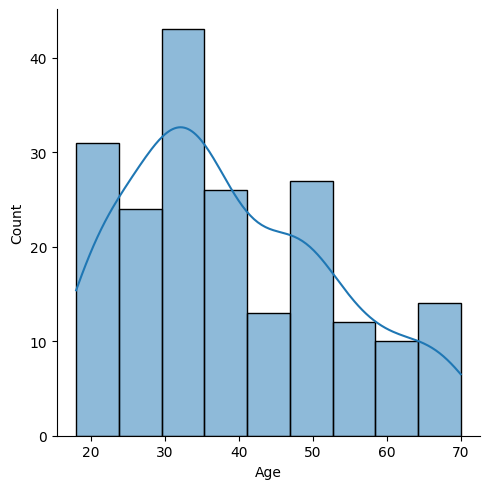

In [123]:
sns.displot(df['Age'], kde=True)
plt.savefig("Age_Distribution.png", dpi=300)
plt.show()
plt.close()

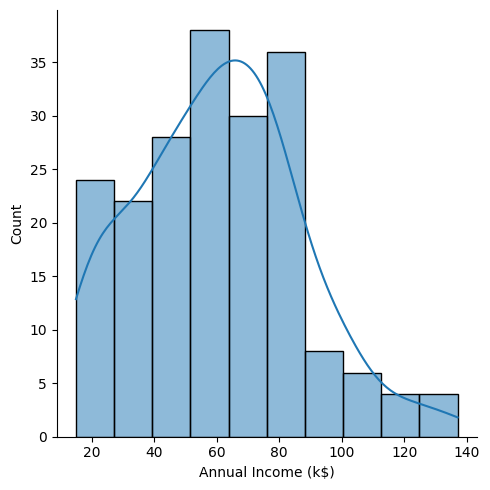

In [124]:
sns.displot(df['Annual Income (k$)'], kde=True)
plt.savefig("Annual_Income_Distribution.png", dpi=300)
plt.show()
plt.close()

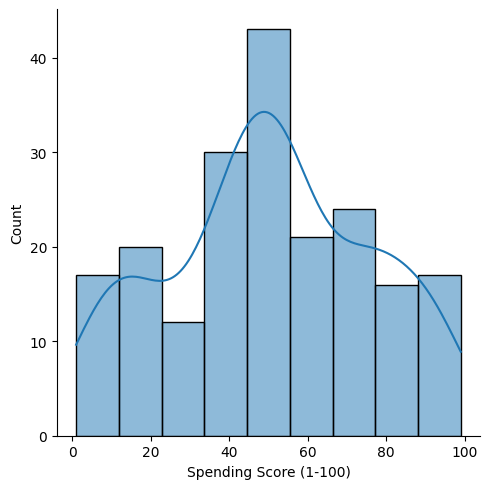

In [125]:
sns.displot(df['Spending Score (1-100)'], kde=True)
plt.savefig("Spending_Score_Distribution.png", dpi=300)
plt.show()
plt.close()

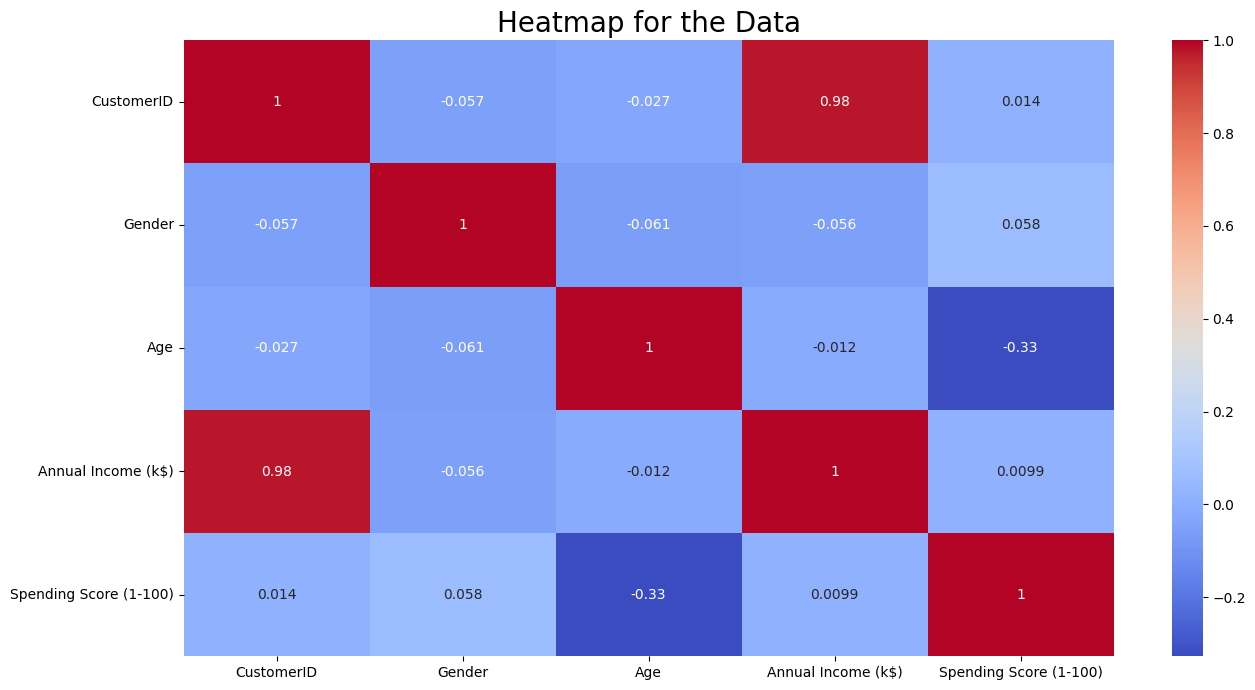

In [126]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap for the Data', fontsize=20)
plt.show()
plt.savefig("Heatmap.png", dpi=300)
plt.close()

<ipython-input-127-4ebbfd350964>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='teal', palette='rainbow')


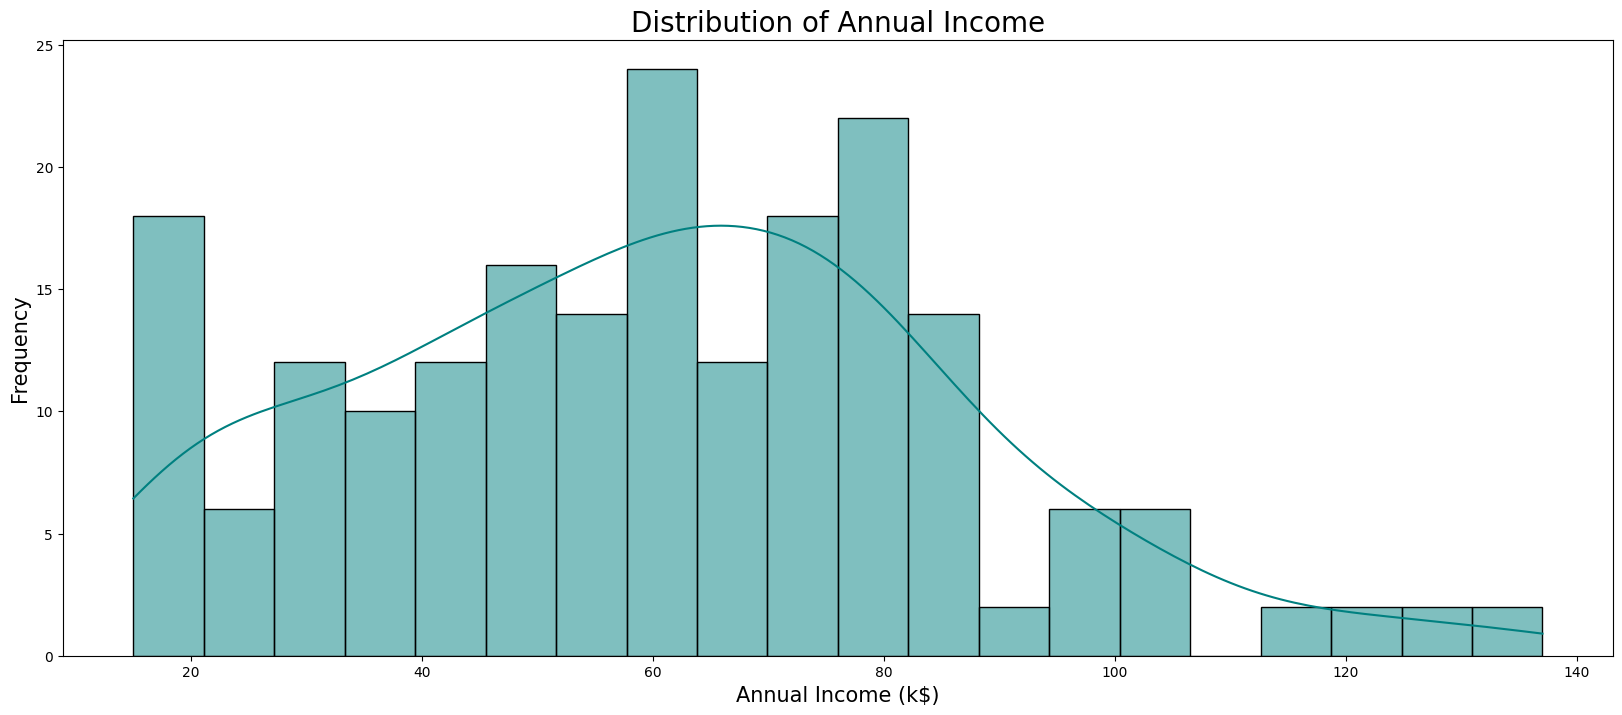

In [127]:
plt.rcParams['figure.figsize'] = (20, 8)

sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='teal', palette='rainbow')

plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
plt.savefig("AnnualIncome_Distribution.png", dpi=300)
plt.close()

<ipython-input-128-b38a49818896>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="Set2")


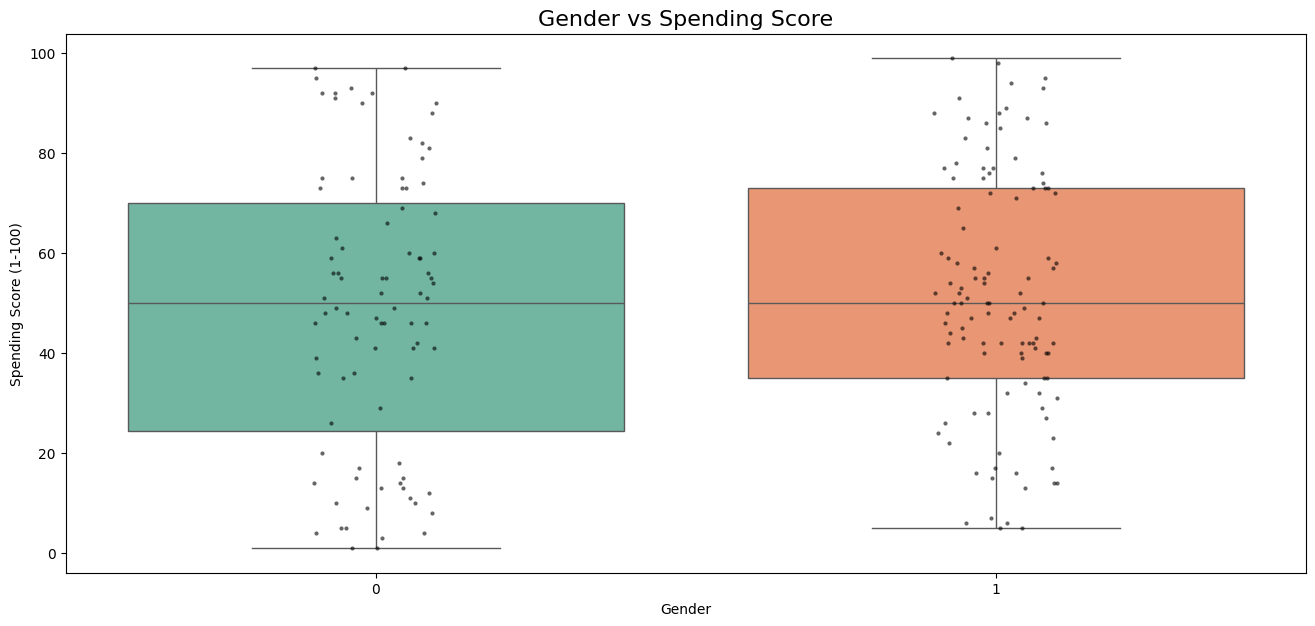

In [128]:
plt.figure(figsize=(16, 7))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="Set2")
sns.stripplot(x="Gender", y="Spending Score (1-100)", data=df, color="k", alpha=0.6, size=3, jitter=True)
plt.title('Gender vs Spending Score', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()
plt.savefig("GendervsSpendingScore.png", dpi=300)
plt.close()

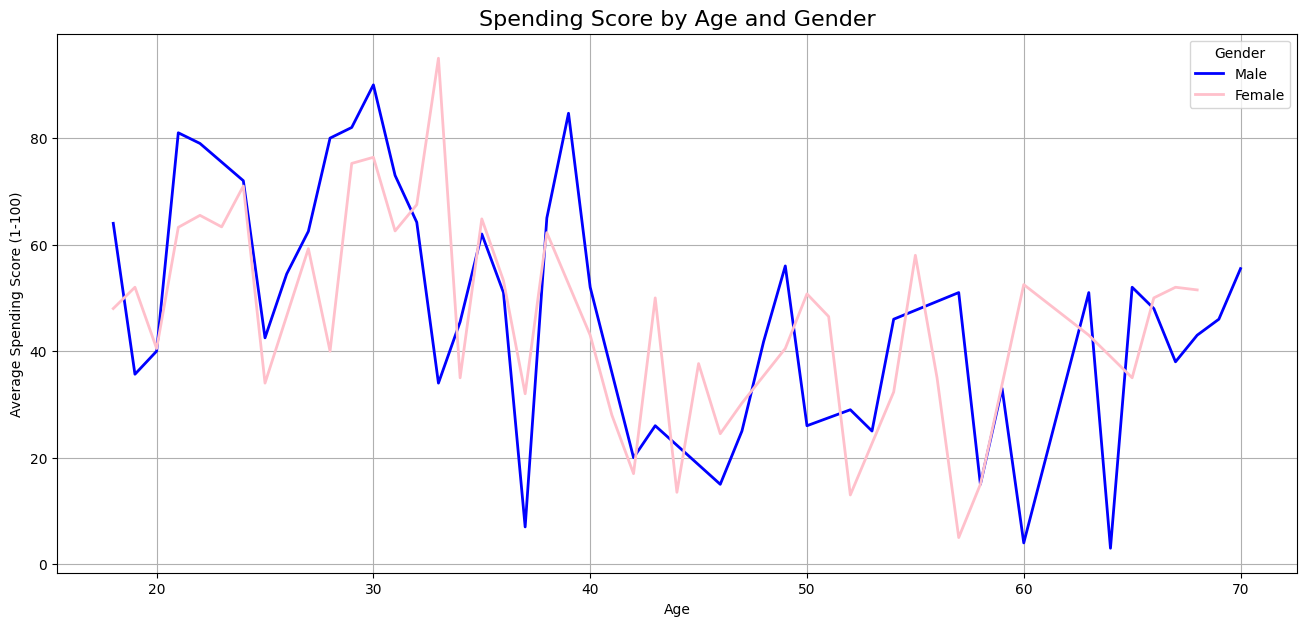

In [129]:
plt.figure(figsize=(16, 7))

age_gender_group = df.groupby(["Age", "Gender"])["Spending Score (1-100)"].mean().reset_index()

male_data = age_gender_group[age_gender_group["Gender"] == 0]  # 0 for Male
female_data = age_gender_group[age_gender_group["Gender"] == 1]  # 1 for Female

sns.lineplot(x="Age", y="Spending Score (1-100)", data=male_data, label="Male", color="blue", linewidth=2)
sns.lineplot(x="Age", y="Spending Score (1-100)", data=female_data, label="Female", color="pink", linewidth=2)

plt.title('Spending Score by Age and Gender', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Average Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()
plt.savefig("Spending_Score_by_Age_and_Gender.png", dpi=300)
plt.close()

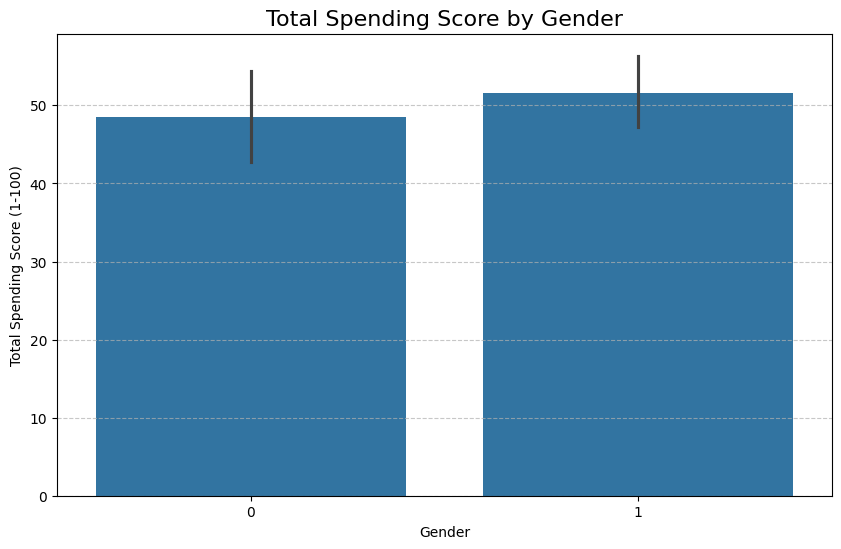

In [130]:
plt.figure(figsize=(10, 6))

# Create a bar plot without specifying palette
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df)

# Add titles and labels
plt.title('Total Spending Score by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Total Spending Score (1-100)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig("Total_Spending_Score_by_Gender.png", dpi=300)
plt.close()

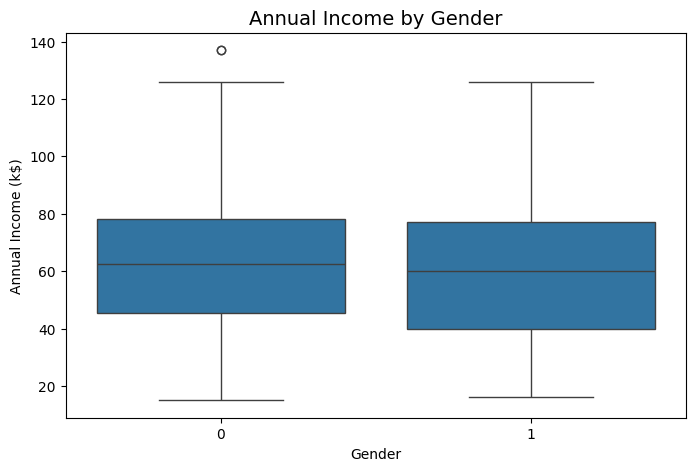

In [131]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.title("Annual Income by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
plt.show()
plt.savefig("Annual_Income_by_Gender.png", dpi=300)
plt.close()

DATA MODELLING

Elbow Method

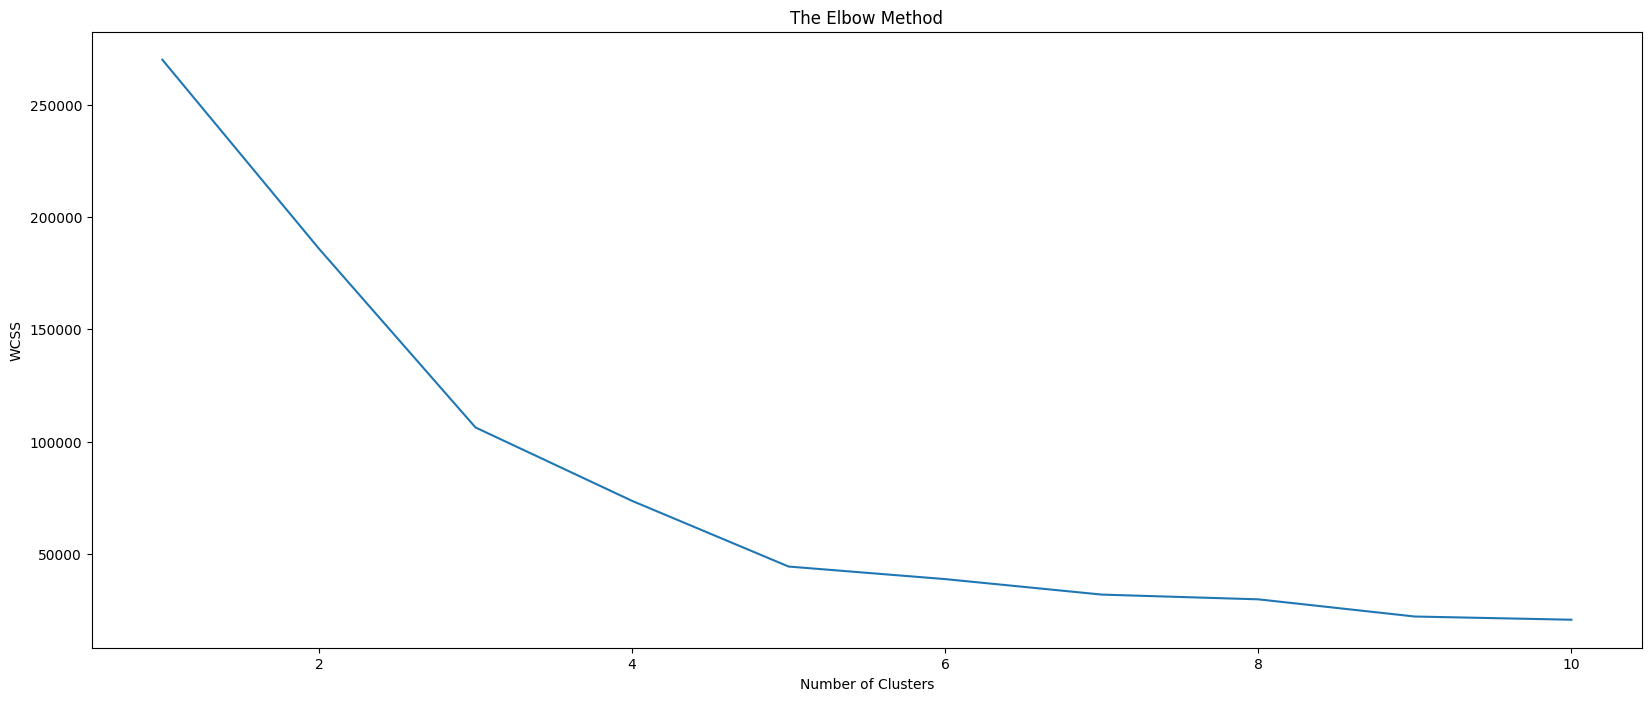

In [132]:
data=df.iloc[:,[3,4]].values

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig("Elbow_AnnualIncomevsSpendingScore.png", dpi=300)
plt.close()

K-Means Clustering

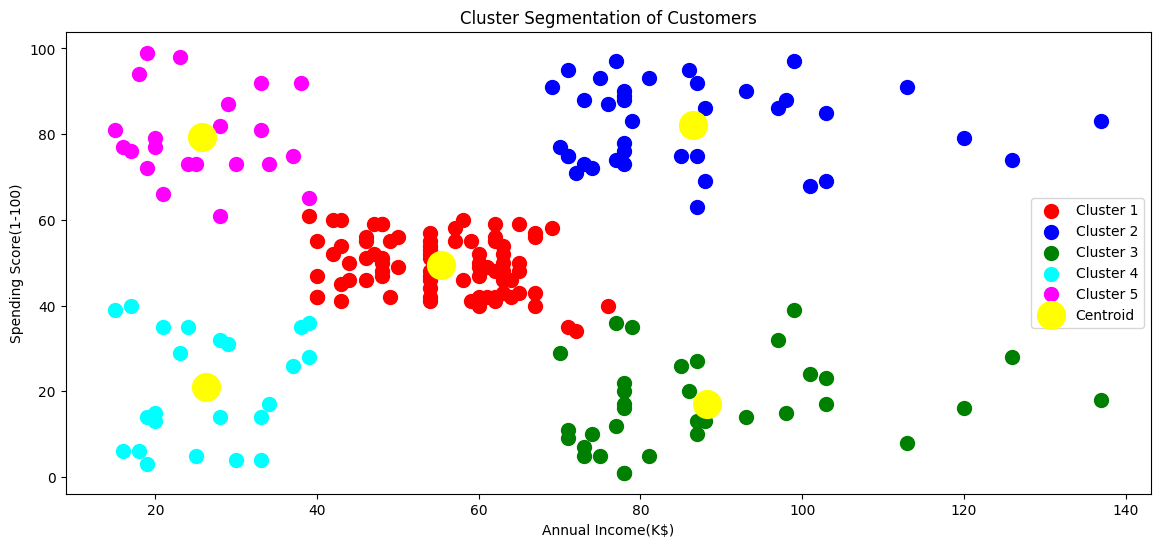

In [133]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
plt.savefig("K-Means_AnnualIncomevsSpendingScore.png", dpi=300)
plt.close()

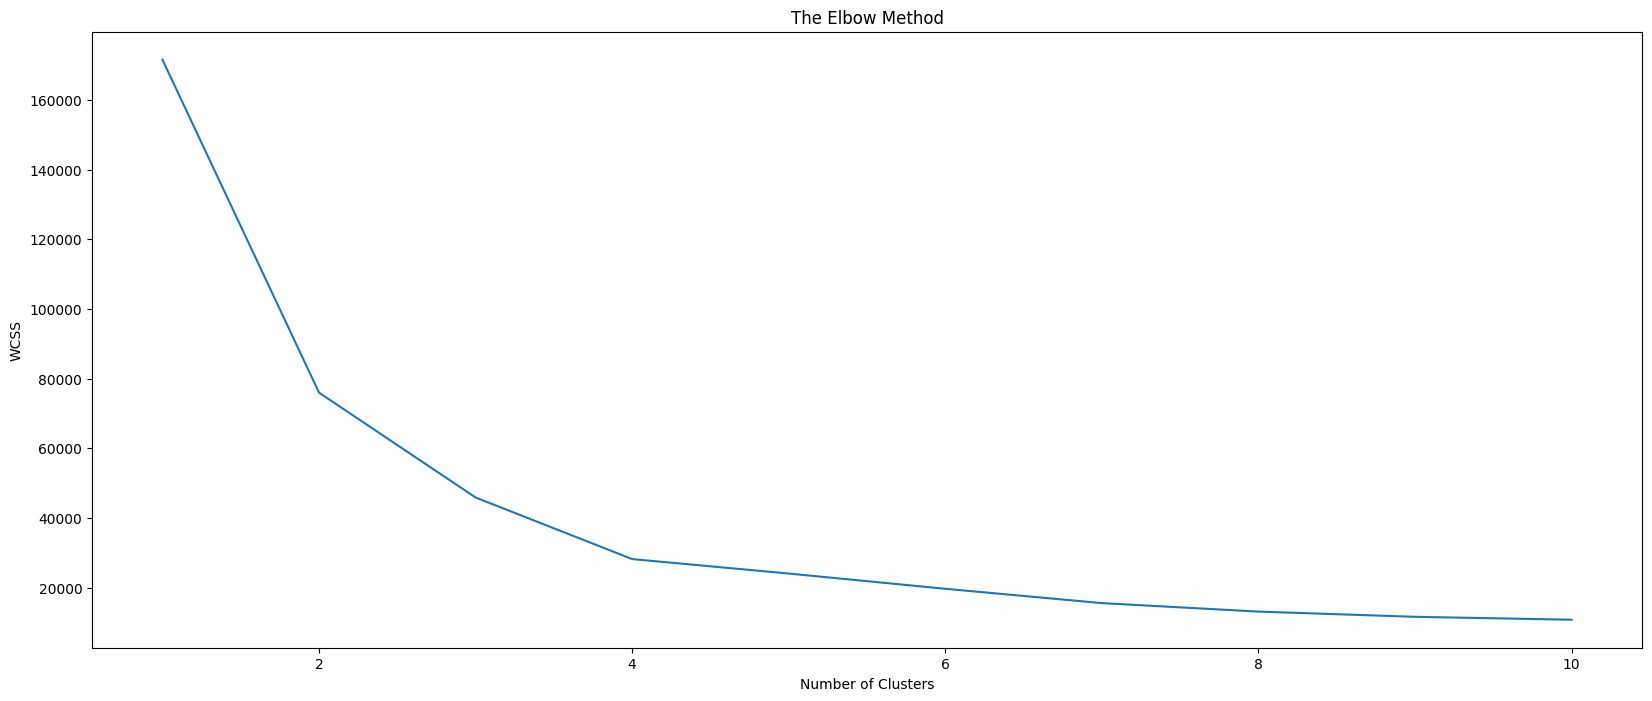

In [134]:
data = df.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig("Elbow_AgevsSpendingScore.png", dpi=300)
plt.close()

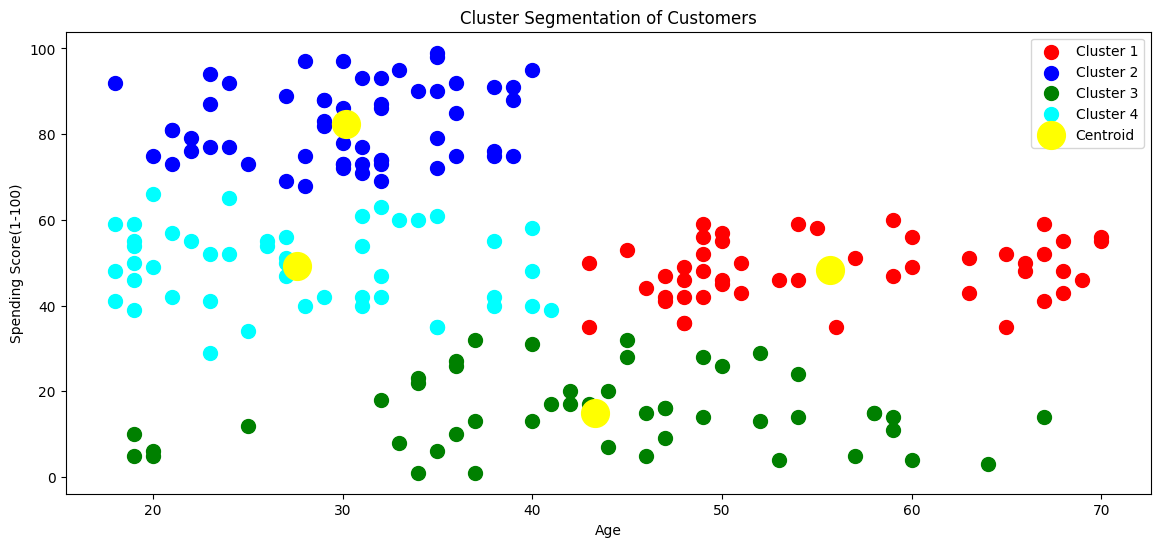

In [135]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
plt.savefig("K-Means_AgevsSpendingScore.png", dpi=300)
plt.close()

DBSCAN Clustering

In [136]:
eps_values = np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values, min_samples))

In [137]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

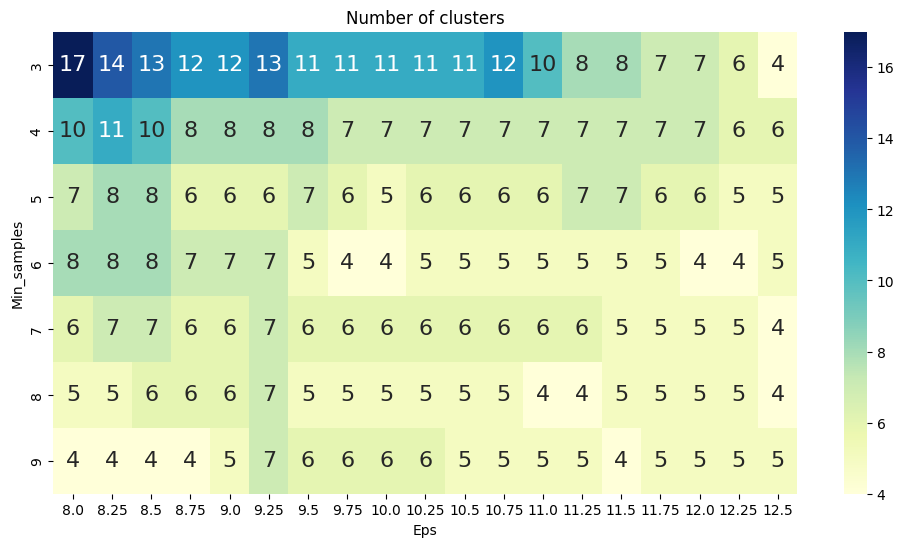

In [138]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()
plt.savefig("DBSCAN_Clusters.png", dpi=300)
plt.close()

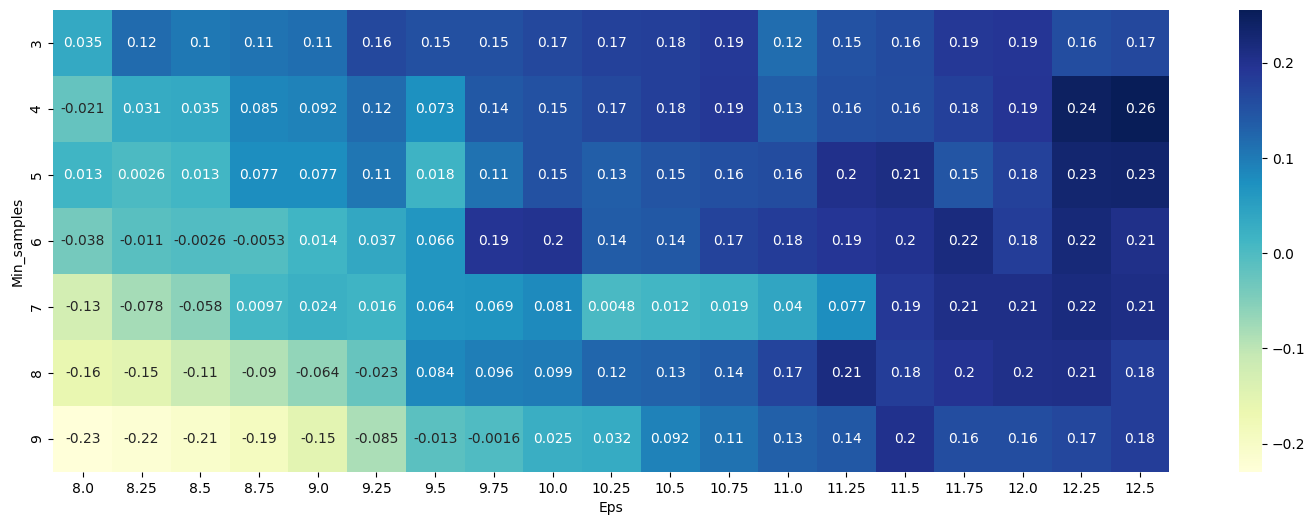

In [139]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()
plt.savefig("DBSCAN_Silhoutte.png", dpi=300)
plt.close()

In [140]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [141]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


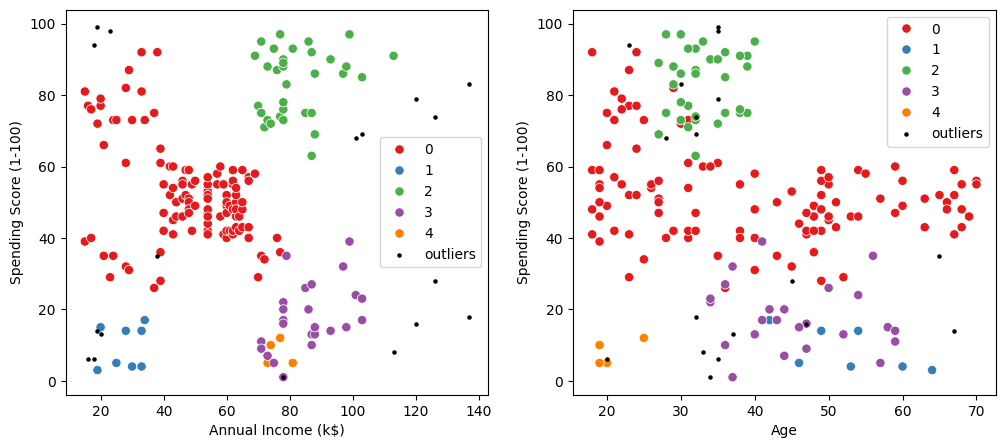

In [142]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

fig2, (axes) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")

axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()
plt.savefig("DBSCAN_Results.png", dpi=300)
plt.close()

Hierarchical Clustering

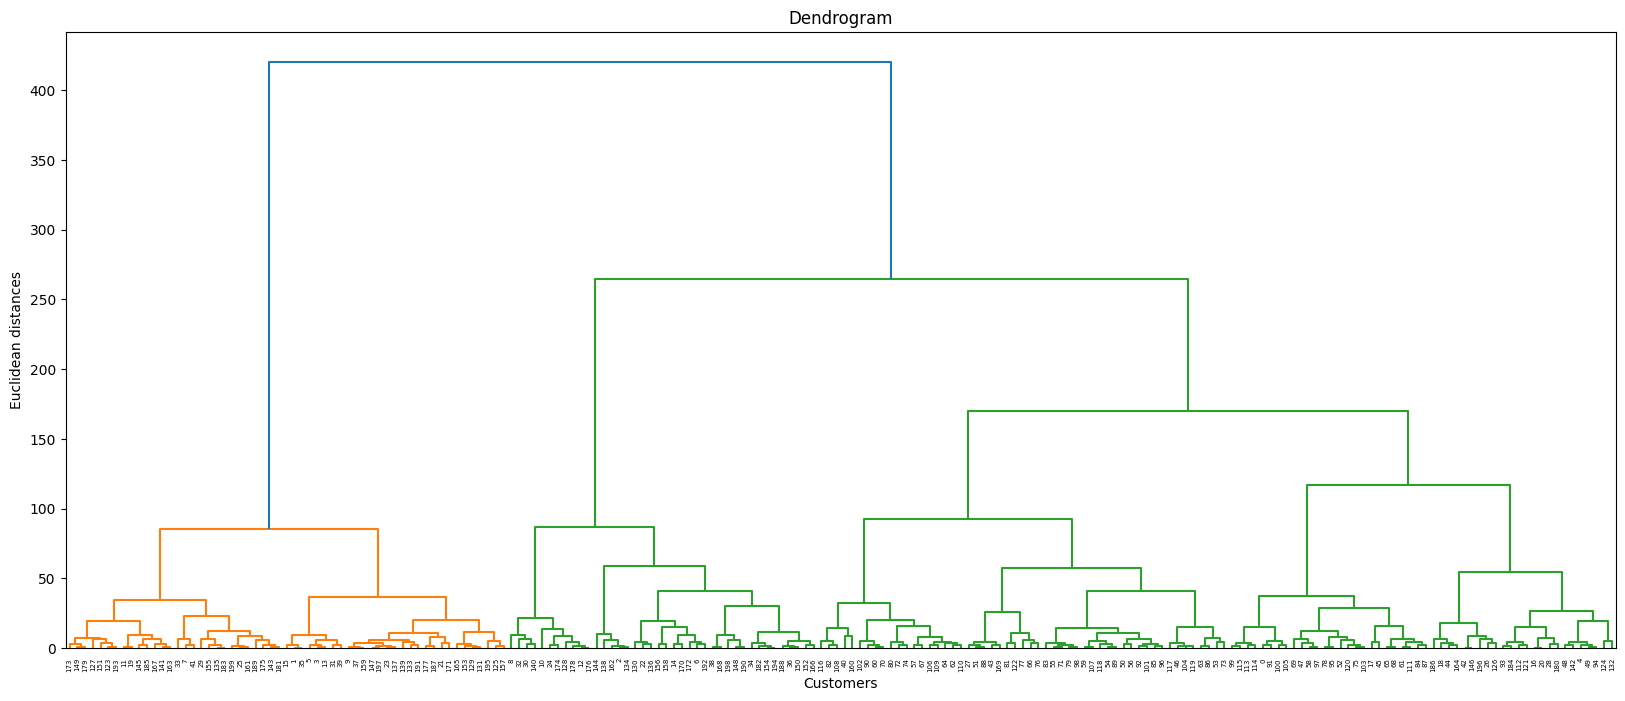

In [143]:
dendogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.savefig("Hierarchical_Clustering_Results.png", dpi=300)
plt.close()

Agglomerative Clustering

In [144]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(data)

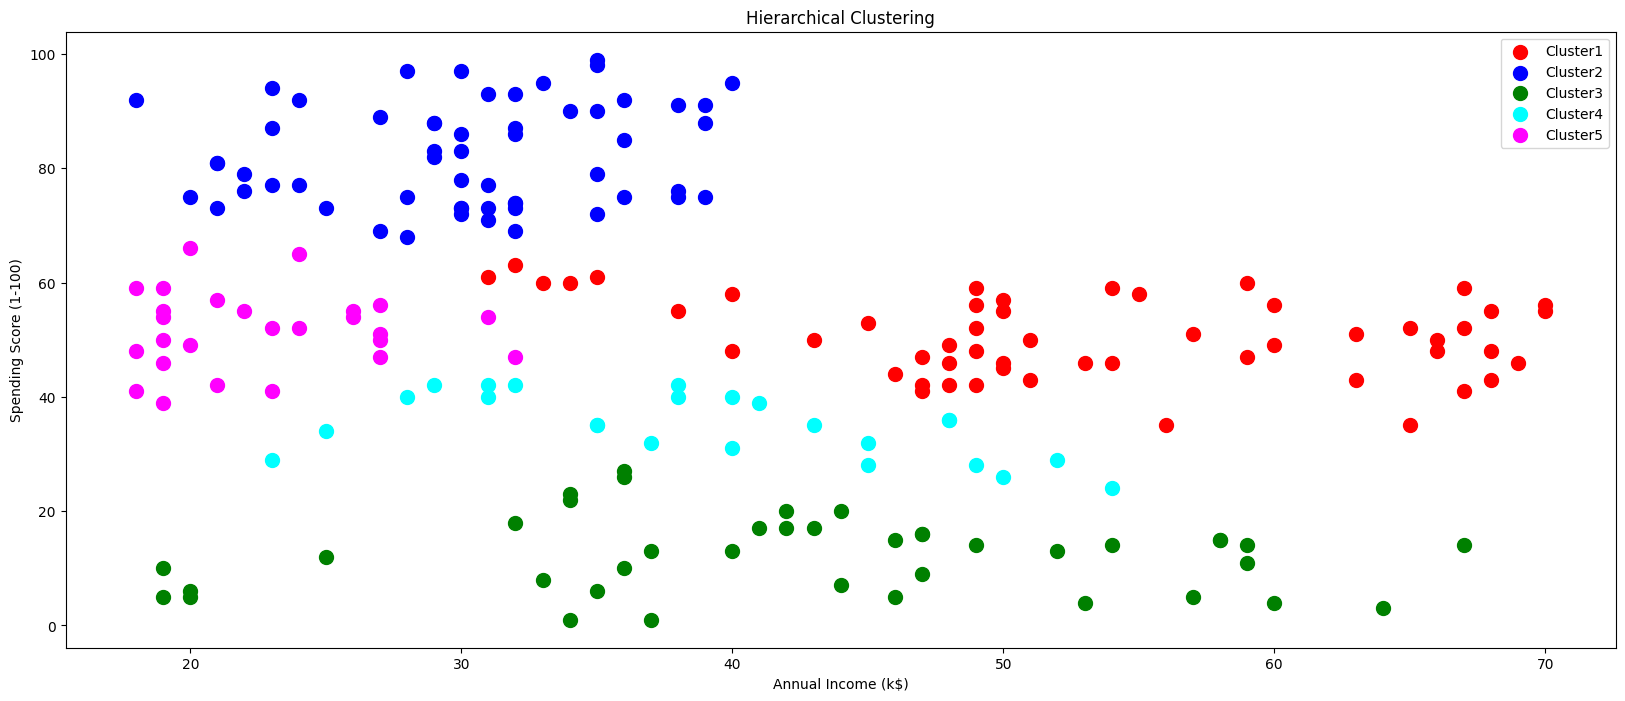

In [145]:
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
plt.savefig("Agglomerative_Clustering_Results.png", dpi=300)
plt.close()